In [1]:
"""
NOTE: to view the tags, you can uncomment all print statements
"""

'\nNOTE: to view the tags, you can uncomment all print statements\n'

In [2]:
import csv

#!pip install venn
from venn import venn
%matplotlib inline

In [3]:
def get_set_from_csv(file_path):
    tag_set = set()
    with open(file_path, encoding="utf8") as csv_file:
        csv_reader = csv.reader(csv_file)
        for tag in csv_reader:
            tag_set.add(tag[0])
        
    #print(tag_set)    
    return tag_set

In [4]:
def write_csv(tags, outfile_path):    
    with open(outfile_path, 'w', encoding="utf8") as file:
        for tag in tags:
            file.write(tag)
            file.write('\n')

In [5]:
crowdtruth = get_set_from_csv('crowdtruth.csv')
tfidf = get_set_from_csv('TF-IDF.csv')
yake = get_set_from_csv('YAKE.csv')
tsne = get_set_from_csv('t-sne.csv')      

print('Number of candidate tags from CrowdTruth: ' + str(len(crowdtruth)))
print('Number of candidate tags from TF-IDF: ' + str(len(tfidf)))
print('Number of candidate tags from YAKE!: ' + str(len(yake)))
print('Number of candidate tags from t-SNE: ' + str(len(tsne)))

Number of candidate tags from CrowdTruth: 493
Number of candidate tags from TF-IDF: 586
Number of candidate tags from YAKE!: 477
Number of candidate tags from t-SNE: 466


# Venn Diagram

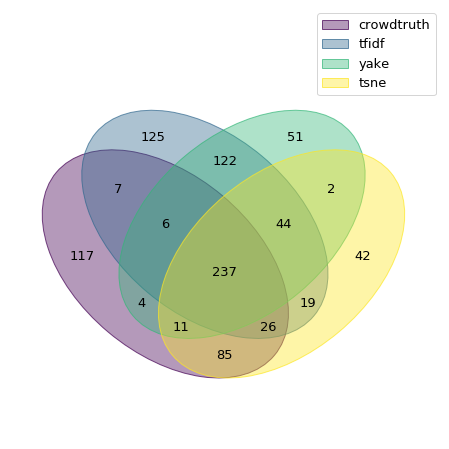

In [6]:
methods = {}
methods['crowdtruth'] = crowdtruth
methods['tfidf'] = tfidf
methods['yake'] = yake
methods['tsne'] = tsne

venn(methods)


# Intersection of all methods

In [7]:
intersection_all = crowdtruth.intersection(tfidf, yake, tsne)
print('Number of tags: ' + str(len(intersection_all)))
print(intersection_all)

write_csv(intersection_all, 'all_methods_intersection')

Number of tags: 237
{'session', 'mode', 'java', 'pro', 'download', 'add', 'file', 'line', 'account', 'refresh', 'homepage', 'close', 'create', 'drop', 'button', 'paste', 'google', 'key', 'hard', 'code', 'white', 'save', 'permission', 'reader', 'email', 'multiple', 'size', 'norton', 'pdf', 'clear', 'freeze', 'show', 'search', 'server', 'microsoft', 'flash', 'log', 'website', 'aol', 'change', 'black', 'audio', 'facebook', 'attachment', 'auto', 'link', 'list', 'prevent', 'check', 'sync', 'box', 'current', 'navigation', 'safe', 'network', 'cache', 'uninstall', 'connection', 'shortcut', 'url', 'delete', 'password', 'bookmark', 'picture', 'history', 'order', 'yahoo', 'background', 'block', 'english', 'mozilla', 'beta', 'downgrade', 'upload', 'program', 'language', 'lock', 'keyboard', 'web', 'dialog', 'printer', 'screen', 'function', 'setup', 'visible', 'run', 'disappear', 'safari', 'enable', 'dropdown', 'address', 'popup', 'engine', 'profile', 'high', 'slow', 'enter', 'display', 'content', '

# Intersection of 3 methods

## t-Sne + TF-IDF + YAKE!

In [8]:
intersection = tsne.intersection(tfidf, yake)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 281


## t-Sne + TF-IDF + CrowdTruth

In [9]:
intersection = tsne.intersection(tfidf, crowdtruth)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 263


## t-Sne + YAKE! + CrowdTruth

In [10]:
intersection = crowdtruth.intersection(yake, tsne)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 248


## TF-IDF + YAKE! + CrowdTruth

In [11]:
intersection = crowdtruth.intersection(tfidf, yake)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 243


# Intersection of 2 methods

## t-Sne

In [12]:
method_names = ['CrowdTruth', 'TF-IDF', 'YAKE!']
methods = [crowdtruth, tfidf, yake]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for t-Sne and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for t-Sne and CrowdTruth: 359


Number of tags for t-Sne and TF-IDF: 326


Number of tags for t-Sne and YAKE!: 294




## TF-IDF

In [13]:
method_names = ['CrowdTruth', 'YAKE!', 't-SNE']
methods = [crowdtruth, yake, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for TF-IDF and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for TF-IDF and CrowdTruth: 359


Number of tags for TF-IDF and YAKE!: 294


Number of tags for TF-IDF and t-SNE: 466




## YAKE!

In [14]:
method_names = ['CrowdTruth', 'TF-IDF', 't-SNE']
methods = [crowdtruth, tfidf, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for YAKE! and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for YAKE! and CrowdTruth: 359


Number of tags for YAKE! and TF-IDF: 326


Number of tags for YAKE! and t-SNE: 466




## CrowdTruth

In [15]:
method_names = ['TF-IDF', 'YAKE!', 't-SNE']
methods = [tfidf, yake, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for CrowdTruth and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for CrowdTruth and TF-IDF: 326


Number of tags for CrowdTruth and YAKE!: 294


Number of tags for CrowdTruth and t-SNE: 466




# Tags unique to only one method

### t-SNE

In [16]:
other_tags = crowdtruth.intersection(tfidf, yake)
tags = tsne - other_tags
print('Number of unique tags for t-SNE: ' + str(len(tags)))
print(tags)

Number of unique tags for t-SNE: 229
{'old', '-install', 'ad', 'compatibility', 'linux', 'number', 'paypal', 'opens', 'local', 'tag', 'ram', 'win10', 'apple', 'recovery', 'customize', 'notification', 'storage', 'verify', 'letter', 'will', 'resize', 'miss', 'https', 'contrast', 'break', 'document', 'signin', 'domain', 'pc', 'extension', 'glitch', 'failure', 'mint', '63', 'visit', 'release', 'respond', '70', 'disabled', 'dark', 'activate', 'corrupt', '10', 'random', 'edge', 'windows10', 'fullscreen', 'problem', 'browsing', 'photo', 'input', 'try', 'store', 'win7', 'blocks', 'type', '70.0', 'manual', 'portal', 'use', 'container', 'hang', 'mobile', 'usage', 'autocomplete', 'new', 'on', 'software', '71', 'filter', 'instal', 'medium', 'opening', 'minimize', 'system', 'quantum', 'symbol', 'acceleration', 'tracking', 'ask', 'android', 'pinterest', 'unresponsive', 'revert', 'ff', 'purchase', 'phone', 'detail', 'ie', 'features', 'would', 'leave', 'unblock', 'loading', 'transfer', 'retrieve', 'st

### TF-IDF

In [17]:
other_tags = crowdtruth.intersection(yake, tsne)
tags = tfidf - other_tags
print('Number of unique tags for TF-IDF: ' + str(len(tags)))
print(tags)

Number of unique tags for TF-IDF: 349
{'statement', 'old', 'minute', '404', 'exist', 'dock', 'fine', '16', 'wheel', 'previously', 'hotmail', 'radio', 'pogo', 'pic', 'long', 'finish', 'direct', 'large', 'foxfire', 'software', 'take', 'movie', 'gray', 'press', 'correct', 'fast', 'osx', 'detail', 'grey', 'space', 'warn', 'track', 'persona', 'middle', 'msn', 'enlarge', 'free', 'know', 'exe', 'identity', 'quicktime', 'look', 'silverlight', 'hate', 'accidentally', 'way', 'day', 'twitter', 'happen', 'farmville', 'get', 'everytime', 'article', 'help', 'constantly', 'bold', 'figure', 'bring', 'hand', 'permanently', 'original', 'compatable', 'go', 'apply', 'uk', 'section', 'firefox4', 'extra', 'selection', 'taskbar', 'zynga', 'setting', 'accept', 'small', 'name', 'return', 'lose', 'rid', 'addon', 'possible', 'compatibility', 'like', 'dll', 'double', 'news', '32', 'certain', 'letter', 'logo', 'document', 'extension', 'kaspersky', 'comcast', 'longer', 'att', 'operation', 'activate', 'corrupt', 're

### YAKE!

In [18]:
other_tags = tsne.intersection(tfidf, crowdtruth)
tags = yake - other_tags
print('Number of unique tags for YAKE!: ' + str(len(tags)))
print(tags)

Number of unique tags for YAKE!: 240
{'face', 'area', 'quick', 'linux', 'minute', 'local', 'tag', 'php', 'double', 'ram', 'exist', 'fine', 'plugins', 'customize', 'give', 'prompt', 'components.classes', 'column', 'read', 'letter', 'height', 'miss', 'ultimate', 'ago', 'document', 'hotmail', 'found', 'machine', 'recently', 'blue', 'extension', 'choice', 'active', 'failure', 'visit', 'release', 'respond', 'remain', 'cooky', 'classic', 'service', 'forward', 'real', 'follow', 'scan', 'long', 'problem', 'additional', 'photo', 'suddenly', 'fire', 'store', 'point', 'net', 'today', 'browse', 'hour', 'recent', 'type', 'large', 'foxfire', 'ver', 'hang', 'software', 'receive', 'week', 'instal', 'movie', 'medium', 'press', 'master', 'organize', 'http', 'normal', 'system', 'correct', 'include', 'fast', 'top', 'source', 'vista', 'lot', 'hit', 'plug', 'osx', 'revert', 'appdata', 'complete', 'general', 'fox', 'completely', 'leave', 'undefined', 'space', 'june', 'highlight', 'place', 'favorite', 'warn',

### CrowdTruth

In [19]:
other_tags = tsne.intersection(tfidf, yake)
tags = crowdtruth - other_tags
print('Number of unique tags for CrowdTruth: ' + str(len(tags)))
print(tags)

Number of unique tags for CrowdTruth: 256
{'another', 'old', 'pinned', 'videos', 'linux', 'number', 'paypal', 'opens', 'tag', 'ram', 'win10', 'typing', 'broken', 'apple', 'plugins', 'saving', 'mojave', 'signature', 'notification', 'resize', 'storage', 'https', 'logo', 'contrast', 'hotmail', 'found', 'domain', 'widget', 'pc', 'denied', 'failure', 'glitch', 'mint', 'sites', 'corrupted', 'buttons', 'deleted', 'disabled', 'dark', 'logged', 'themes', 'one', 'corrupt', 'checkbox', 'random', 'empty', 'edge', 'changed', 'fullscreen', 'browsing', 'blocked', 'wikipedia', 'input', 'cookies', 'files', 'changes', 'blocks', 'win7', 'browse', 'full', 'id', 'crashing', 'portal', 'details', 'container', 'mobile', 'usage', 'autocomplete', 'new', 'pictures', 're-install', 'tv', 'emails', 'twitch', 'master', 'opening', 'missing', 'quantum', 'captcha', 'top', 'hacked', 'source', 'ask', 'acceleration', 'addons', 'tracking', 'android', 'pinterest', 'unresponsive', 'rendering', 'ff', 'music', 'purchase', 'pho